# Processamento Digital de Imagens - AP2

In [ ]:
!pip install bitarray

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from bitarray import bitarray

### Três tipos de curva (lago, baía e segmento de linha) úteis para diferenciar objetos diluídos em um imagem são mostradas na figura abaixo (na ordem, da esquerda para a direita). Baseando-se nas técnicas estudadas, desenvolva um algoritmo morfológico/lógico para diferenciar entre essas formas. A entrada $x$ para o seu algoritmo seria uma dessas três curvas. A saída deve corresponder ao tipo da entrada (_ie_., 1, 2 ou 3). Você pode assumir que as curvas têm 1 pixel de espessura e são totalmente conectados. Eles podem aparecer em qualquer orientação, portanto sua solução deve ser indepentente de rotação.

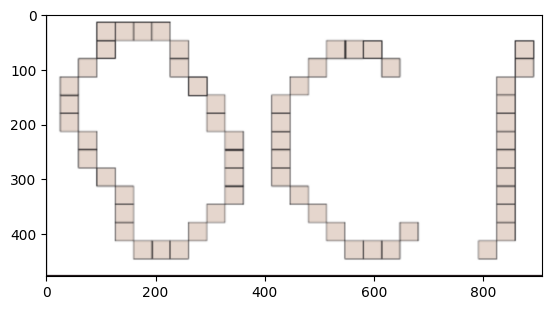

In [3]:
img1 = cv2.imread('imagem.png')
plt.imshow(img1)

O que pode-se esperar que aconteça se;
1. O ponto inicial no algoritmo de preenchimento de lacuna é um ponto na borda do objeto.
1. O ponto inicial no algoritmo de preenchimento de lacuna está fora da borda.

In [27]:
def identify_curve_type(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

  # preenchimento de lacuna (flood fill)
  def flood_fill(x, y):
      count = 0
      queue = [(x, y)]

      while queue:
          px, py = queue.pop(0)

          if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
              if binary[py, px] == 255:
                  count += 1
                  binary[py, px] = 0
                  queue.append((px + 1, py))
                  queue.append((px - 1, py))
                  queue.append((px, py + 1))
                  queue.append((px, py - 1))

      return count

  # define o tipo de curva
  contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  for contour in contours:
      contour_length = cv2.arcLength(contour, True)
      contour_area = cv2.contourArea(contour)

      if contour_length > 0:
          circularity = 4 * np.pi * contour_area / (contour_length * contour_length)

          if circularity < 0.4:
              return 1 # Lago
          elif 0.4 <= circularity <= 0.8:
              return 2 # Baía
          else:
              return 3 # Segmento de linha
  return 0

curve_type = identify_curve_type(img1)

if curve_type == 1:
    print("Tipo de curva: Lago")
elif curve_type == 2:
    print("Tipo de curva: Baía")
elif curve_type == 3:
    print("Tipo de curva: Segmento de linha")
else:
    print("Tipo de curva não identificado")

Tipo de curva: Baía


### A imagem 'bgr_encoded.png' contém uma mensagem inserida numa fatia binária de um de seus canais. Obtenha essa mensagem.

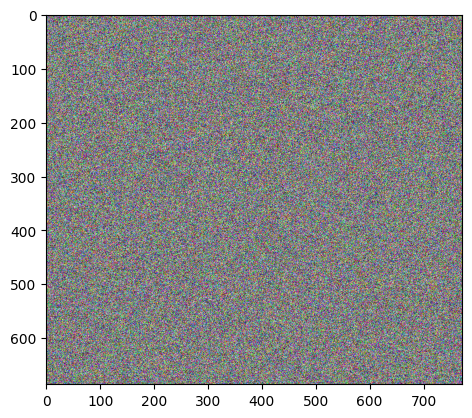

In [6]:
img2_url = 'https://uc344be134a563a1ada06f82a6c9.previews.dropboxusercontent.com/p/thumb/AB6JLy3SUe5nHTMAUrx1Byj_xSv2VrPAqfGnFY7E8IHDAIg7VCVkXvPcswrc_QBjFUIVlRHav8kUcZpfU25BH6wTi--dVLuC_Z7UAMgXrkjcQhVz4OThvKM_FXIKoayErslGc4N61zEDT9LgVwH33LqvTruwm1ryz7lIB50DKS5X35aTV10cXbymOwgzoWSBHruFfb7_LtWt1bScNkmGNiPtlRxOm-2tQIyLFPEUfpnzOKwF9weaiFy21Bnxlt6H55selyebGmRu5CuUf6SfV6OOmRjvlZ8bFTqI9khJtWcrqyPNHQ61OpKEcE88oSufFI8LuhAzQsdKC_lJepPKzR9q9m2ZnxTtUeC8mSDkzWFrsKCBQfUdpstiPS9b6uWbTCqYudhEaVLFUYQ3JTimnFFwuWCgGDke27MoIxvIp5MaQA/p.png'
img_array = np.frombuffer(requests.get(img2_url).content, np.uint8)
img2 = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
plt.imshow(img2)

In [24]:
def extract_binary_slice(image, channel_index):
    channel = image[:, :, channel_index] # canal selecionado

    binary_slice = np.bitwise_and(channel, 1) # bit menos significativo
    return binary_slice

def binary_slice_to_message(binary_slice):
    binary_strings = [''.join(str(bit) for bit in subarray) for subarray in binary_slice]
    binary_string = ''.join(binary_strings)
    bit_array = bitarray(binary_string)
    byte_array = bit_array.tobytes()

    try:
        message = byte_array.decode('utf-8')
    except UnicodeDecodeError:
        message = byte_array.decode('latin1')

    return message


channel_index = 2 # (R = 2, G = 1, B = 0)

binary_slice = extract_binary_slice(img2, channel_index)

message = binary_slice_to_message(binary_slice)
message

'0º3Üy\x11_yE\xad»`.Î\rò\\úO\x16L\x8cè¬{²â\x0ch\x0c\\þn\x92>\x80ÛOh¢\x0e\x12ô\x07¥ÿû)n6þ\x96ª\x97ÜriÙ\'z(EBú\x12õ\x9f\x8d"OW\x94c\x1a0 Lö84Äð^\x8eµMÔ\x92Á£õënùSwÛ<ß\x99ëJ¤Â\x8aC;2Âë;¥\x94z¶êzíª}×\x00\x03;4\x17¼\x0bÙ³rÃ¶\x8d$÷\x83ø;\x9eÉ(\x87àÉÉÒ\x98\x14¸¿\x0fYN\x80â\x8c«&\x12J\x9c¨Å?\x97\r\x94\x07dÙs\x9d¾üæ6BØ:4\x16\x01,\x0f\xa0vQ½ø®¦\x11\x03\x0eiì\x0201\x14\x115ËÔÀÜ\x00!¬¡\tïu÷ë\\\x18\x980b¢TzXE´\x9e\x0f¿\n-û\x97}z¶HH\x88\x91rgD\x12\x19|¬ä\x0fÑCkOÕ\x05wú\x03\tT$\x12\x87>H\x12\ti\x86cìøÑ;\x81/\x91F\x1f\xadMVºZ\x89%^\x83\x984L\'à®a\x18¤\x04\x93.«g\x9fG!¤\x8eeÓÆj\x81¥UÈ¹¢ÜëÐí´¡\x88õ×ù\x9eº\r\x9aÄ\x1a$CÁ0~O¿â\x8a´\x86ÁwY®®¸1VÝWÅ\x11ýÇ cÉ}ÓmÕ\rÜB§\x95\x80\x87¸¥Í\x00d\x94ÆÔ®L\'\x96¨d\x13ìGG\\\x00ã÷Oq%ö°áw1\x9do\x82T9õ=é>¦óµmuzÐ\x13\x08½öv}\x97ØÁÊ;Þ\x8b\xadÂ\x1c\x02\r\x12µTJÍ#Ó£¢`\x8b´.ÁNÊ\x8f?\x08ãÆ$»\x8a\nÅÑ\x18Vr·%»\x84\x8e\x82²Ë\x8b/#¸í=¬Îé\x94ü\x1d`]4ëµ§ú\x92°wyWKPØÈ*:¢\x0b\x95sLï]08\x80l\x161\x19IÉÃAj-J\x7f\x81MÆ"FÏ\x13½í8µT\x10u\x10Ï-\x99\x83²ÝFgJmX\x97\x97Ó½\x96\x82\x8eïÅ¨|ðY¥§S\x9fV

### A primeira etapa de pré-processamento da imagem 'redacao.png' deve ser a localização das linhas pretas para extração de subimagens que contenham o texto de cada linha da redação manuscrita. Segmente as imagens da redação para obter um resultado similar ao da imagem 'redacao_linhas.png'.


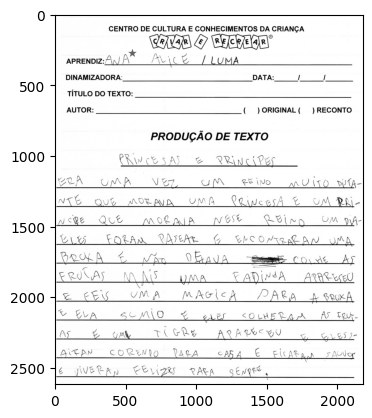

In [7]:
red_url = 'https://github.com/tfvieira/digital-image-processing/blob/main/img/redacao.png?raw=true'
img_array = np.frombuffer(requests.get(red_url).content, np.uint8)
img3 = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
plt.imshow(img3)

![redacao_linhas.png](attachment:redacao_linhas.png)

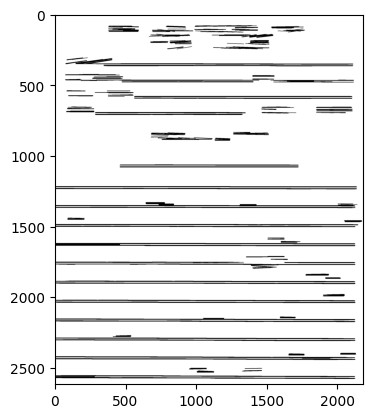

In [21]:
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# aplicar o filtro Canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# dilatar as bordas
dilated = cv2.dilate(edges, None, iterations=2)

# transformada de Hough
lines = cv2.HoughLinesP(dilated, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

blank_image = np.zeros_like(img3)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(blank_image, (x1, y1), (x2, y2), (255, 255, 255), 2)

result = cv2.bitwise_not(blank_image)

plt.imshow(result)